In [20]:
import re
import pandas as pd
file_path = 'result_classification.txt'

with open(file_path, 'r') as file:
    lines = file.readlines()

def list2str(l):
    s = ''
    for ll in l:
        s+=ll
    return s
accuracies = []
models = []
elayers =[]
filters =[]
itrs = []
ids = []
seq_len = []
fcs = []
dls = []
for line in lines:
    if line.startswith('accuracy:'):
        accuracy = float(line.split(':')[1])
        accuracies.append(accuracy)
    if line.startswith('classification'):
        pattern_model = r'classification_bone_c_(.*?)_bone_drill_c'
        model = list2str(re.findall(pattern_model, ''.join(line)))
        
        pattern_elayer = r'el(\d+)_'
        elayer = list2str(re.findall(pattern_elayer, ''.join(line)))
        
        pattern_dlayer = r'dl(\d+)_'
        dl = list2str(re.findall(pattern_dlayer, ''.join(line)))
        
        pattern_seq = r'sl(\d+)_'
        seq = list2str(re.findall(pattern_seq, ''.join(line)))
        
        pattern_fc = r'fc(\d+)_eb'
        fc = list2str(re.findall(pattern_fc, ''.join(line)))
        
#         start_index = line.index("'Exp'") + len("'Exp'")
        start_index = line.index('Exp') + len('Exp')
        info = line[start_index+1:]
        filter_type = info.split('_')[0]
        itr = int(info.split('_')[-1])
        # 这个地方很奇怪，不知道后面还多了点啥，可能是空格
        ids.append(model+elayer+dl+filter_type+seq+'_'+fc)
        models.append(model)
        elayers.append(elayer)
        dls.append(dl)
        filters.append(filter_type)
        itrs.append(itr)
        seq_len.append(seq)
        fcs.append(fc)
        # print(line[:-5])
        #print(model,elayer,filter_type,itr)

#print('Accuracies:', accuracies)
print(len(accuracies),len(models),len(ids),)
df = pd.DataFrame({"model": models,
                   "elayer": elayers,
                   'dlayer':dls,
                   "filter":filters,
                   "iter":itrs,
                   "acc":accuracies,
                   'id':ids,
                   'fc':fcs,
                   'seq_len':seq_len})
dff = df[-9::]
print(dff['acc'].mean())

228 228 228
0.7208935392791894


In [21]:
dff

,model,elayer,dlayer,filter,iter,acc,id,fc,seq_len
219,my,2,1,,0,0.673393,my21500_3,3,500
220,my,2,1,,1,0.721973,my21500_3,3,500
221,my,2,1,,2,0.736173,my21500_3,3,500
222,my,2,1,,3,0.704783,my21500_3,3,500
223,my,2,1,,4,0.760837,my21500_3,3,500
224,my,2,1,,5,0.734679,my21500_3,3,500
225,my,2,1,,6,0.753363,my21500_3,3,500
226,my,2,1,,7,0.716741,my21500_3,3,500
227,my,2,1,,8,0.686099,my21500_3,3,500


- 0.6695384920786175 7
- 0.667136882103817 6
-  0.7108821065381379 12
- my model 0.7322815392578428
- 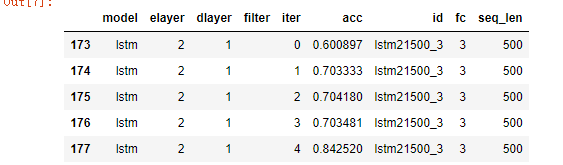
- 这个是使用了lstm的结果
- 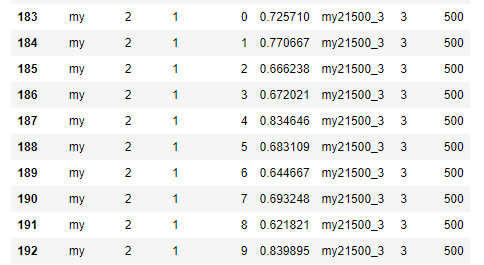
- 这个是使用informer作为的，好的那次比较好 ，差的那次到了0.69，multi-wavelet那个好像是比傅里叶好点
- 使用adam效果并不好，使用Lion效果比较好一些
- Lion type1 0.0001 fold1均值在0.6900491138159299，weight decay增加到0.1，原本是0.01
- 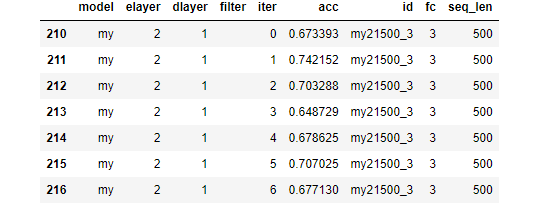